In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [3]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())
print("-" * 50)


First 5 rows of the dataset:
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2

In [4]:
# summary of the DataFrame's structure and data types
print("Dataset Information:")
df.info()
print("-" * 50)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
--------------------------------------------------


In [5]:
# Check for missing values in each column
print("Missing Values per Column:")
print(df.isnull().sum())
print("-" * 50)

Missing Values per Column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------


In [6]:
# Handle missing values in the 'country' column
df['country'] = df['country'].fillna('Unknown')

In [7]:
# Handle missing values in 'director' and 'cast' columns
df['director'] = df['director'].fillna('')
df['cast'] = df['cast'].fillna('')

In [8]:
# Convert 'date_added' to datetime, handling any parsing errors with coerce
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [12]:
# Import necessary libraries for text processing
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# Combine relevant text columns
df['combined_features'] = df['listed_in'].fillna('') + ' ' + df['description'].fillna('')

In [14]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [15]:
# Transform the combined text into a matrix of TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

In [21]:
# Import K-Means
from sklearn.cluster import KMeans



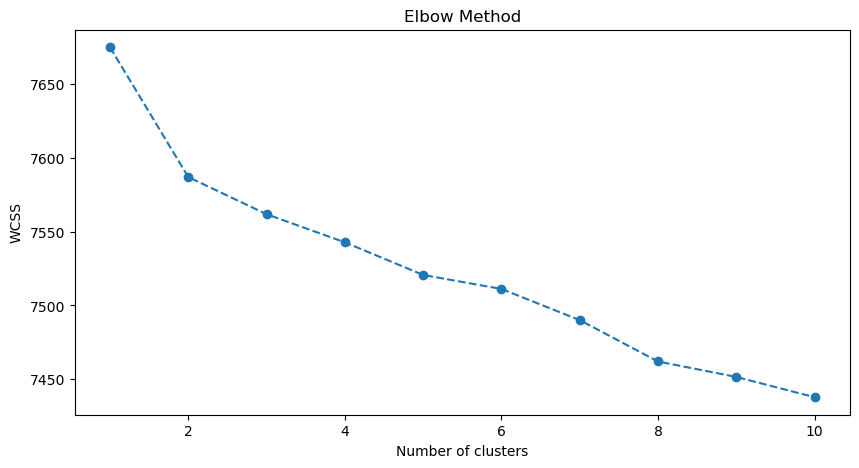

In [22]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [23]:
# Based on the elbow plot, let's assume 5 clusters is optimal
k_clusters = 5
kmeans = KMeans(n_clusters=k_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)



In [24]:
# Add the cluster labels back to the DataFrame
df['cluster_label'] = clusters
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min